In [24]:
import pandas as pd

In [25]:
all_results = pd.read_excel("reports/RESULTS.xlsx")

In [26]:
import pandas as pd

# Assuming 'all_results' is your DataFrame
# Load your DataFrame here, for example:
# all_results = pd.read_csv('your_file.csv')  # If your data is in a CSV file

# Filter rows where Train Accuracy is greater than or equal to Test Accuracy
filtered_results = all_results[all_results['Training Accuracy'] >= all_results['Test Accuracy']]

# Now 'filtered_results' will contain only the rows where Train Accuracy is equal to or better than Test Accuracy
print(filtered_results)


   optimizer     lr loss_criterion  num_epochs  batch_size  patience  \
0       Adam  0.010  Cross-Entropy         200           8        50   
1       Adam  0.010  Cross-Entropy         200           8        50   
5       Adam  0.010  Cross-Entropy         200           8        50   
6       Adam  0.001  Cross-Entropy         200           8        50   
7        SGD  0.001  Cross-Entropy         200           8        50   
8        SGD  0.010  Cross-Entropy         400           8       200   
9        SGD  0.010  Cross-Entropy         400           8       200   
10       SGD  0.010  Cross-Entropy         400           8       200   
11       SGD  0.010  Cross-Entropy         400           8       200   
12       SGD  0.005  Cross-Entropy         400           8       200   
13       SGD  0.005  Cross-Entropy         400           8       200   
14       SGD  0.005  Cross-Entropy         400           8       200   
16       SGD  0.001  Cross-Entropy         400           8      

In [27]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   optimizer            44 non-null     object 
 1   lr                   44 non-null     float64
 2   loss_criterion       44 non-null     object 
 3   num_epochs           44 non-null     int64  
 4   batch_size           44 non-null     int64  
 5   patience             44 non-null     int64  
 6   Description          44 non-null     object 
 7   image_type           44 non-null     object 
 8   Training Accuracy    44 non-null     float64
 9   Validation Accuracy  44 non-null     float64
 10  Test Accuracy        44 non-null     float64
 11  DATETIME             44 non-null     object 
 12  weight_decay         6 non-null      float64
 13  momentum             6 non-null      float64
dtypes: float64(6), int64(3), object(5)
memory usage: 4.9+ KB


In [28]:
all_results = all_results.query('num_epochs >= 10')


In [29]:
df = all_results

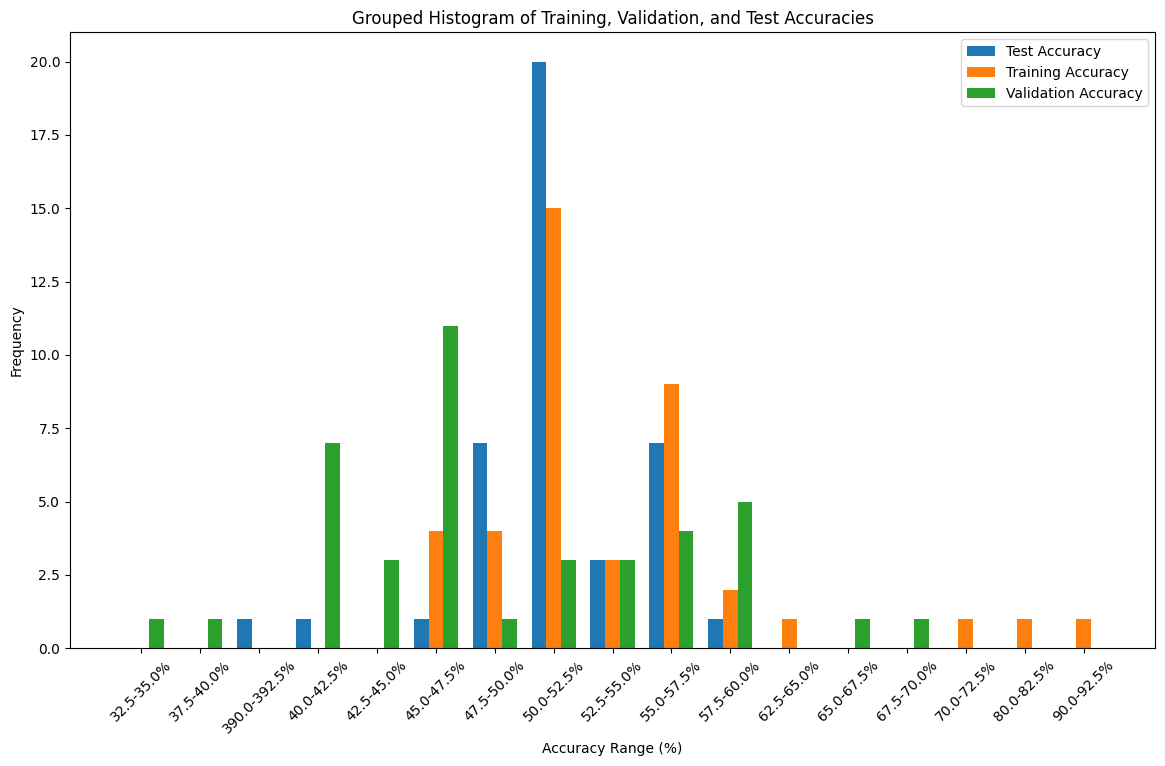

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Define the categorization function
def categorize_accuracy(val):
    return f"{int(val // 2.5) * 2.5}-{int(val // 2.5) * 2.5 + 2.5}%"

# Apply the categorization
for column in ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']:
    df[column + ' Category'] = df[column].apply(categorize_accuracy)

# Create a plot data DataFrame
plot_data = pd.melt(df, id_vars=[], value_vars=['Training Accuracy Category', 'Validation Accuracy Category', 'Test Accuracy Category'],
                    var_name='Type', value_name='Accuracy Range')

# Organize data for plotting
grouped = plot_data.groupby(['Accuracy Range', 'Type']).size().unstack().fillna(0)

# Plot settings
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.25  # width of bars
ind = np.arange(len(grouped))  # the x locations for the groups
shift = np.array([-width, 0, width])  # shifts for each type to group them

# Plotting each type
for i, column in enumerate(grouped.columns):
    ax.bar(ind + shift[i], grouped[column], width, label=column.replace(' Category', ''))

# Formatting plot
ax.set_xlabel('Accuracy Range (%)')
ax.set_ylabel('Frequency')
ax.set_title('Grouped Histogram of Training, Validation, and Test Accuracies')
ax.set_xticks(ind)
ax.set_xticklabels(grouped.index, rotation=45)
ax.legend()

plt.show()

In [31]:
# Display unique values and their counts for the specified columns
columns_of_interest = ['optimizer', 'lr', 'loss_criterion', 'num_epochs', 'batch_size', 'weight_decay', 'image_type']

# Iterate over the list of columns and print the unique values and their counts
for column in columns_of_interest:
    print(f"Unique values and counts for {column}:")
    print(all_results[column].value_counts(dropna=False))  # Include NaN values in the counts
    print("\n")


Unique values and counts for optimizer:
SGD     25
Adam    16
Name: optimizer, dtype: int64


Unique values and counts for lr:
0.001    16
0.010    13
0.005     4
0.050     4
0.100     4
Name: lr, dtype: int64


Unique values and counts for loss_criterion:
BCEWithLogits    21
Cross-Entropy    20
Name: loss_criterion, dtype: int64


Unique values and counts for num_epochs:
200    23
400    12
150     4
50      2
Name: num_epochs, dtype: int64


Unique values and counts for batch_size:
8     24
16    17
Name: batch_size, dtype: int64


Unique values and counts for weight_decay:
NaN    36
0.5     3
0.0     2
Name: weight_decay, dtype: int64


Unique values and counts for image_type:
Resampled Images(Masked PET)               13
Resampled Images(Spatial Normalization)    12
Resampled Images_fused                     11
Resampled Images(Co-registered PET)         5
Name: image_type, dtype: int64




In [32]:
# First, group by the parameters along with the image type and get the max test accuracy
grouped_data = all_results.groupby([
    'loss_criterion', 'optimizer', 'num_epochs', 'batch_size', 'lr', 'image_type'
])['Test Accuracy'].max().reset_index()

# Now, pivot this data to get image types as columns
pivot_table = grouped_data.pivot_table(
    values='Test Accuracy', 
    index=['loss_criterion', 'optimizer', 'num_epochs', 'batch_size', 'lr'], 
    columns='image_type', 
    aggfunc='max'
).reset_index()  # Reset the index to turn the groupby columns into regular columns

# Optional: fill NaN values with a filler, e.g., 0 or an appropriate marker if no data is available for a combination
pivot_table_filled = pivot_table.fillna(0)

# Display the pivot table
print(pivot_table_filled)


image_type loss_criterion optimizer  num_epochs  batch_size     lr  \
0           BCEWithLogits      Adam         150           8  0.001   
1           BCEWithLogits      Adam         200          16  0.001   
2           BCEWithLogits      Adam         200          16  0.010   
3           BCEWithLogits      Adam         200          16  0.050   
4           BCEWithLogits      Adam         200          16  0.100   
5           BCEWithLogits       SGD         150           8  0.001   
6           BCEWithLogits       SGD         200           8  0.001   
7           BCEWithLogits       SGD         200          16  0.001   
8           BCEWithLogits       SGD         200          16  0.010   
9           BCEWithLogits       SGD         200          16  0.050   
10          BCEWithLogits       SGD         200          16  0.100   
11          Cross-Entropy      Adam         200           8  0.001   
12          Cross-Entropy      Adam         200           8  0.010   
13          Cross-En

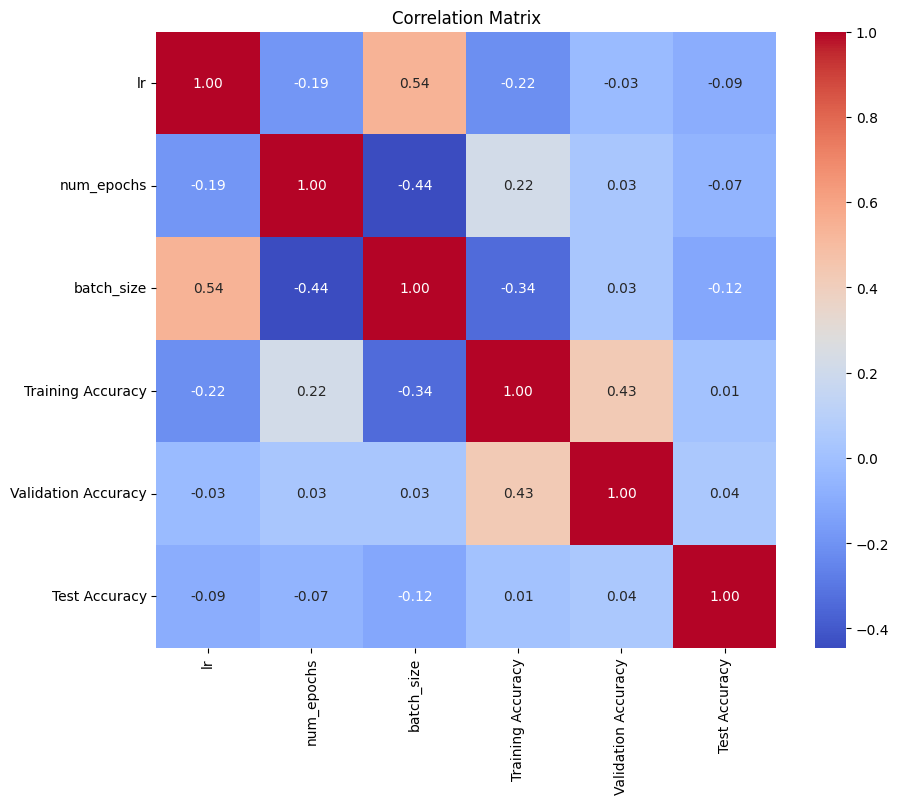

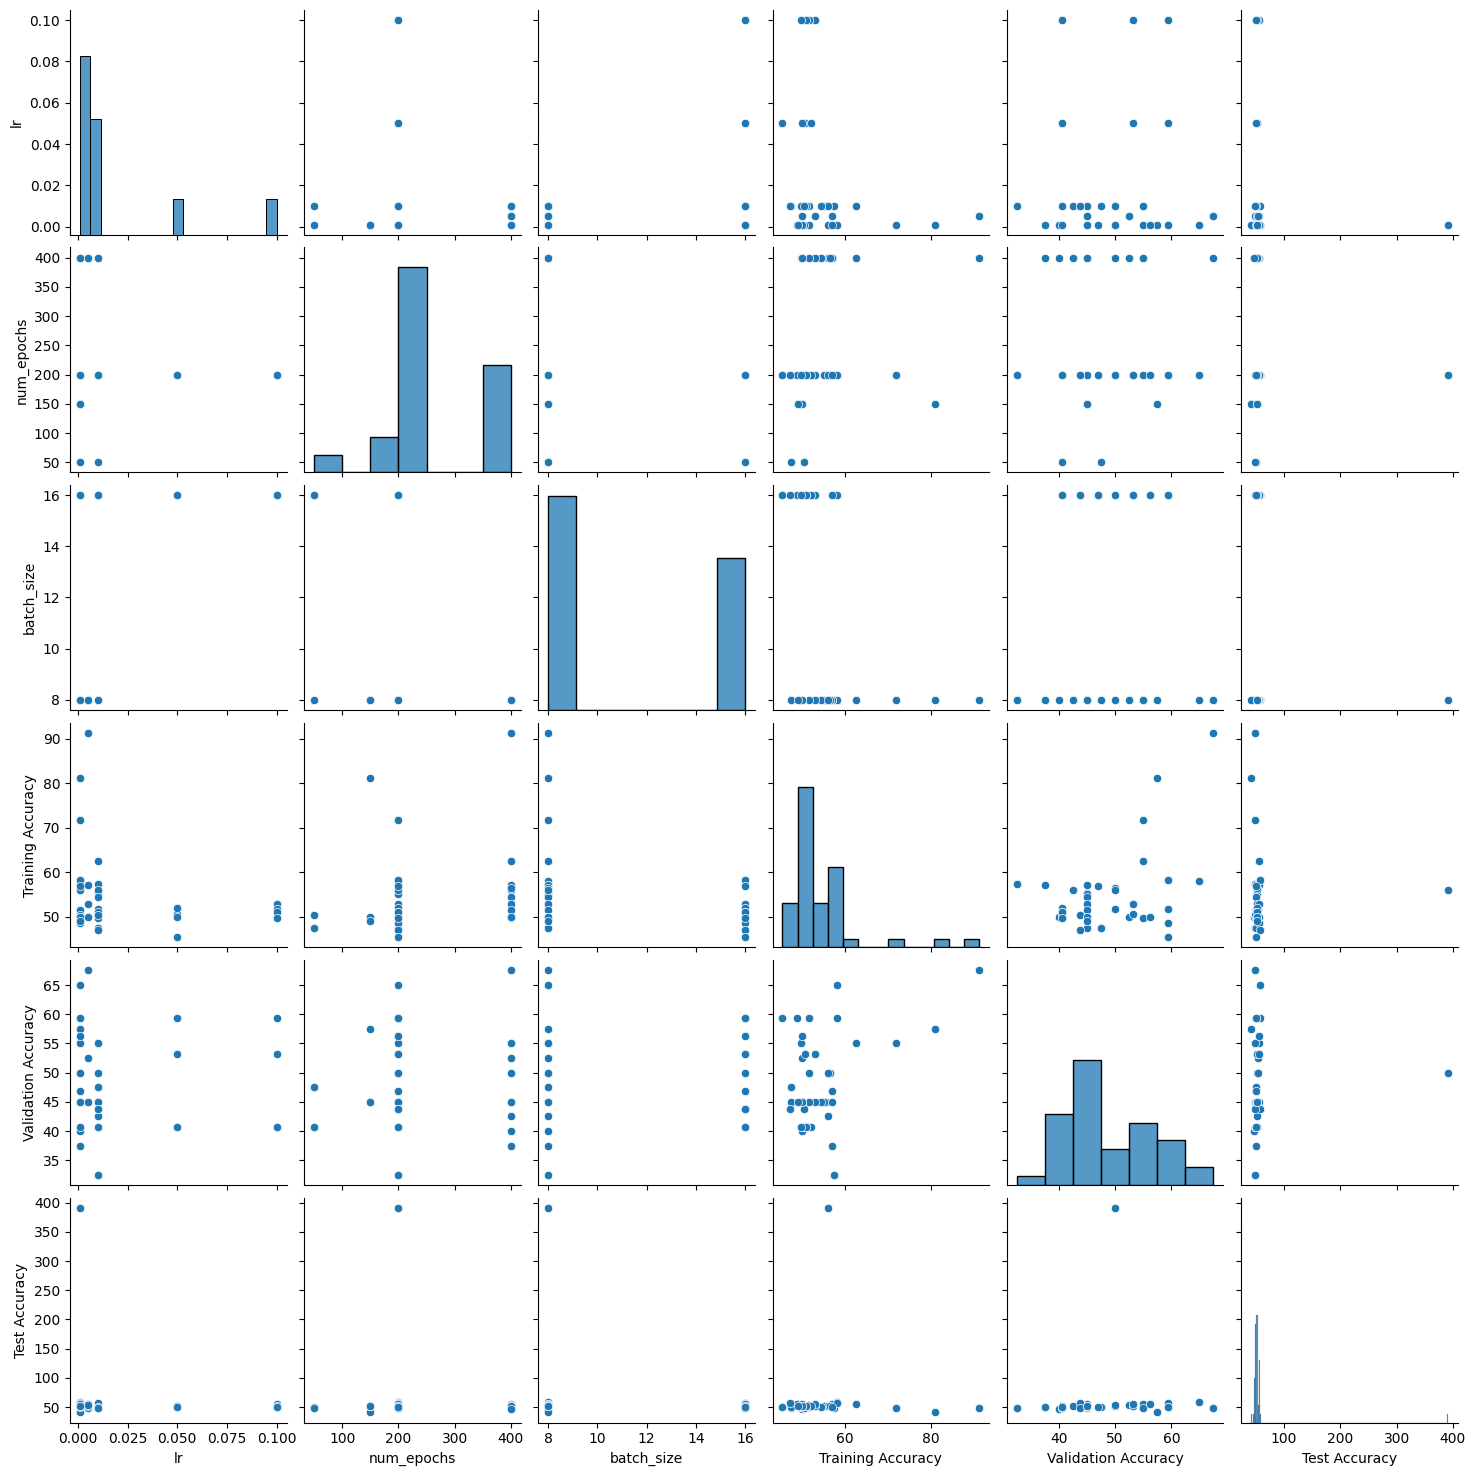

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation
numeric_columns = ['lr', 'num_epochs', 'batch_size', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']

# Calculate correlation matrix
corr_matrix = all_results[numeric_columns].corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairwise scatter plots
sns.pairplot(all_results[numeric_columns])
plt.show()


In [34]:
# Group by 'optimizer' and get mean accuracies
grouped_data = all_results.groupby('optimizer')['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'].mean()
print(grouped_data)


           Training Accuracy  Validation Accuracy  Test Accuracy
optimizer                                                       
Adam               52.407536            47.539062      51.086648
SGD                55.874494            49.000000      64.881818


C:\Users\Micha\AppData\Local\Temp\ipykernel_13844\4241716366.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = all_results.groupby('optimizer')['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'].mean()


In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
le_optimizer = LabelEncoder()
le_loss_criterion = LabelEncoder()

# Fit label encoder and return encoded labels
all_results['optimizer_encoded'] = le_optimizer.fit_transform(all_results['optimizer'])
all_results['loss_criterion_encoded'] = le_loss_criterion.fit_transform(all_results['loss_criterion'])

# Show the first few rows to verify the transformation
print(all_results[['optimizer', 'optimizer_encoded', 'loss_criterion', 'loss_criterion_encoded']].head())


  optimizer  optimizer_encoded loss_criterion  loss_criterion_encoded
0      Adam                  0  Cross-Entropy                       1
1      Adam                  0  Cross-Entropy                       1
4      Adam                  0  Cross-Entropy                       1
5      Adam                  0  Cross-Entropy                       1
6      Adam                  0  Cross-Entropy                       1


In [36]:
from sklearn.tree import DecisionTreeRegressor

# Prepare data (assuming all necessary preprocessing)
X = all_results[['lr', 'num_epochs', 'batch_size', 'optimizer_encoded', 'loss_criterion_encoded']]
y = all_results['Test Accuracy']

# Fit a decision tree
model = DecisionTreeRegressor(max_depth=5)
model.fit(X, y)

# Get feature importances
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(importances.sort_values(by='Importance', ascending=False))


                  Feature  Importance
1              num_epochs    0.543073
2              batch_size    0.236882
3       optimizer_encoded    0.130585
4  loss_criterion_encoded    0.051106
0                      lr    0.038354


# Results from single experiment

In [37]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

def retrieve_experiment_results(path):
    """Retrieve experiment results from an Excel file and calculate classification metrics."""
    try:
        # Load the Excel file from the specified sheet
        data = pd.read_excel(path, sheet_name='Results')
        print("Data loaded successfully.")
        
        # Calculate the metrics
        accuracy = accuracy_score(data['Actual Label'], data['Prediction'])
        report = classification_report(data['Actual Label'], data['Prediction'], target_names=data['Actual Label'].unique())
        
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:")
        print(report)
        
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Specify the path to the Excel file
file_path = r'reports\2024-05-13_20-53-19_Experiment.xlsx'

# Call the function with the specified path
experiment_data = retrieve_experiment_results(file_path)


Data loaded successfully.
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

          CN       0.56      0.67      0.61        43
         MCI       0.61      0.49      0.54        45

    accuracy                           0.58        88
   macro avg       0.58      0.58      0.58        88
weighted avg       0.59      0.58      0.58        88

